# Filter Maps

In [1]:
import torch
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using Device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using Device: cuda

NVIDIA GeForce RTX 3060 Laptop GPU
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [14]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'

from imgprocesslib import homedir

In [15]:
filters_list  = [{'Telescope': 'NIRCam Short Wavelength',
                  'filters': ['090w', '115w', '150w', '182m', '200w', '210m'],
                  'colours': ['#B7AAEE', '#AF47FF', '#5C55B3', '#99CCFF', '#00A8E0', '#0101DF']},
                 {'Telescope': 'NIRCam Long Wavelength',
                  'filters': ['277w', '335m', '356w', '410m', '430m', '444w', '460m', '480m'],
                  'colours': ['#256E37', '#B58653', '#A84900', '#0B412B', '#51C083', '#C8D96F', '#89931E', '#6DB41D']},
                 {'Telescope': 'HST ACS', 
                  'filters': ['435w', '606w', '775w', '814w', '850lp'],
                  'colours': ['#660000', '#DD0000', '#DB2E6B', 'orange', '#E0D100']},
                ]

In [16]:
for file in os.listdir(os.path.join(homedir, "Filter_files")):
    if file.endswith('.dat'):
        print(file)

HST_ACS_WFC.F435W.dat
HST_ACS_WFC.F606W.dat
HST_ACS_WFC.F775W.dat
HST_ACS_WFC.F814W.dat
HST_ACS_WFC.F850LP.dat
JWST_NIRCam.F090W.dat
JWST_NIRCam.F115W.dat
JWST_NIRCam.F150W.dat
JWST_NIRCam.F182M.dat
JWST_NIRCam.F200W.dat
JWST_NIRCam.F210M.dat
JWST_NIRCam.F277W.dat
JWST_NIRCam.F335M.dat
JWST_NIRCam.F356W.dat
JWST_NIRCam.F410M.dat
JWST_NIRCam.F430M.dat
JWST_NIRCam.F444W.dat
JWST_NIRCam.F460M.dat
JWST_NIRCam.F480M.dat


090w : 7906 10166
115w : 10002 12952
150w : 13198 16818
182m : 17095 19845
200w : 17384 22434
210m : 19766 22186


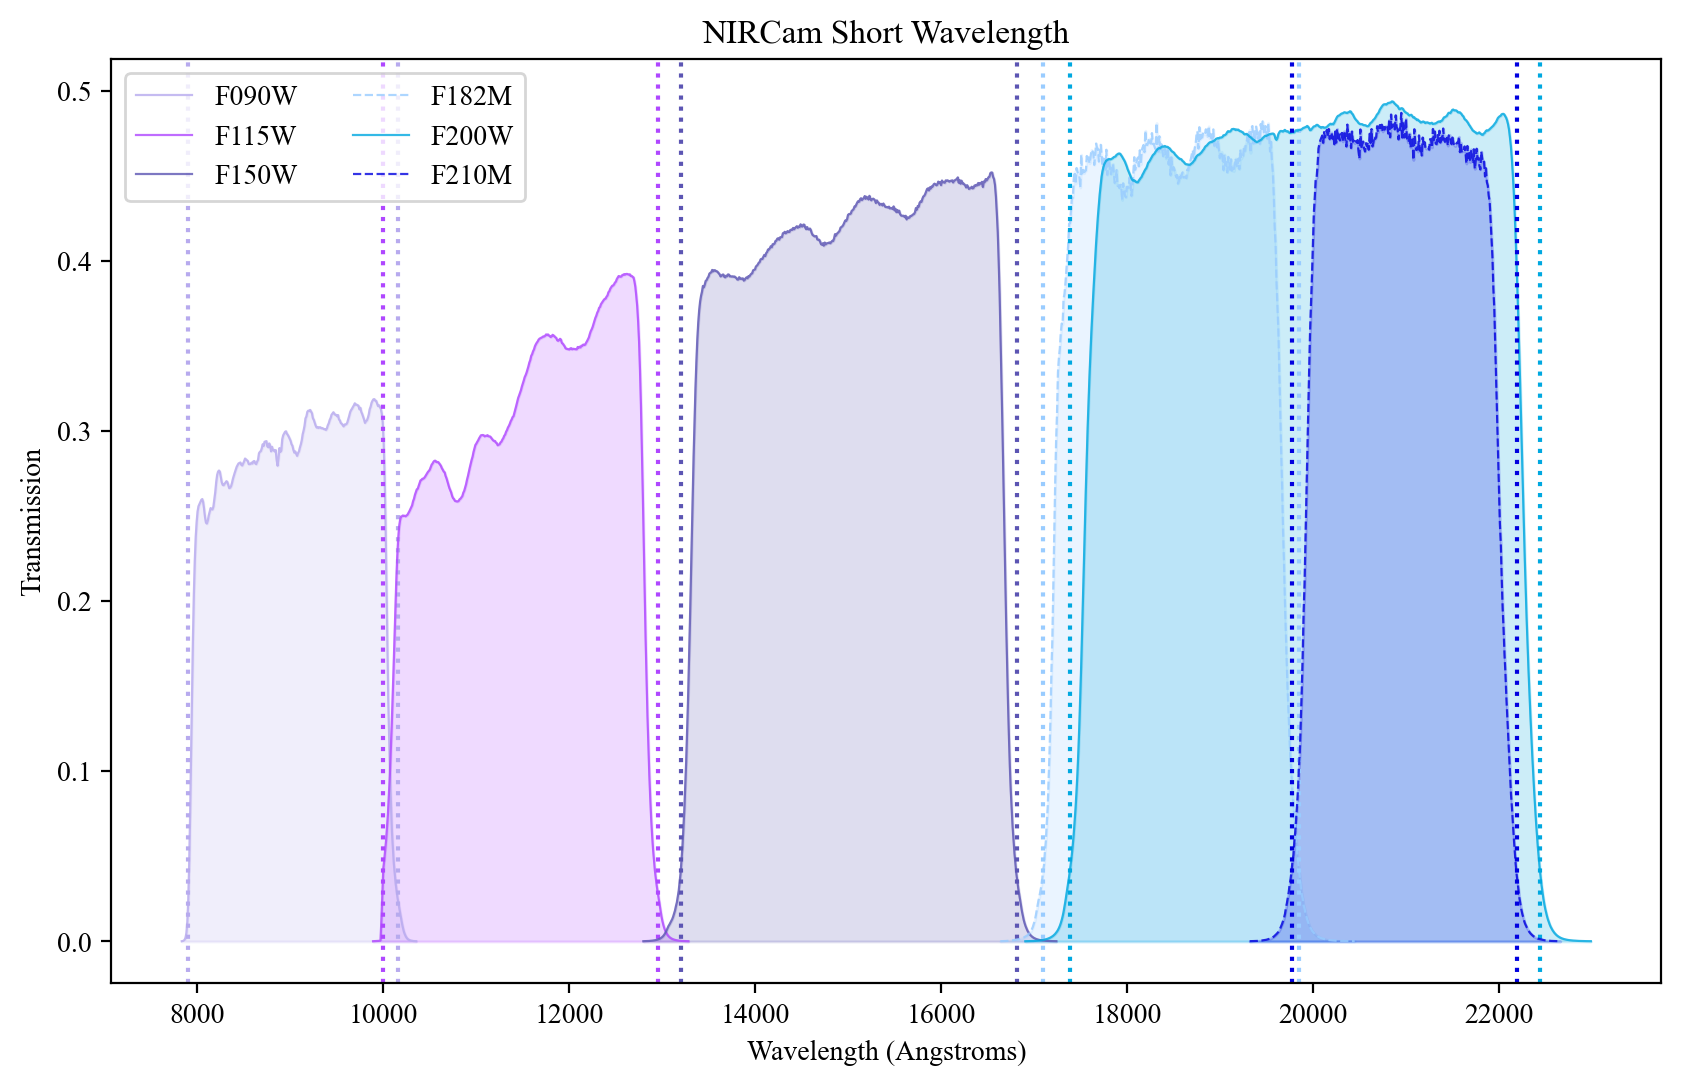

277w : 23899 31646
335m : 31457 35943
356w : 31024 40294
410m : 38199 43537
430m : 41469 44199
444w : 38442 50725
460m : 44928 47793
480m : 46226 50414


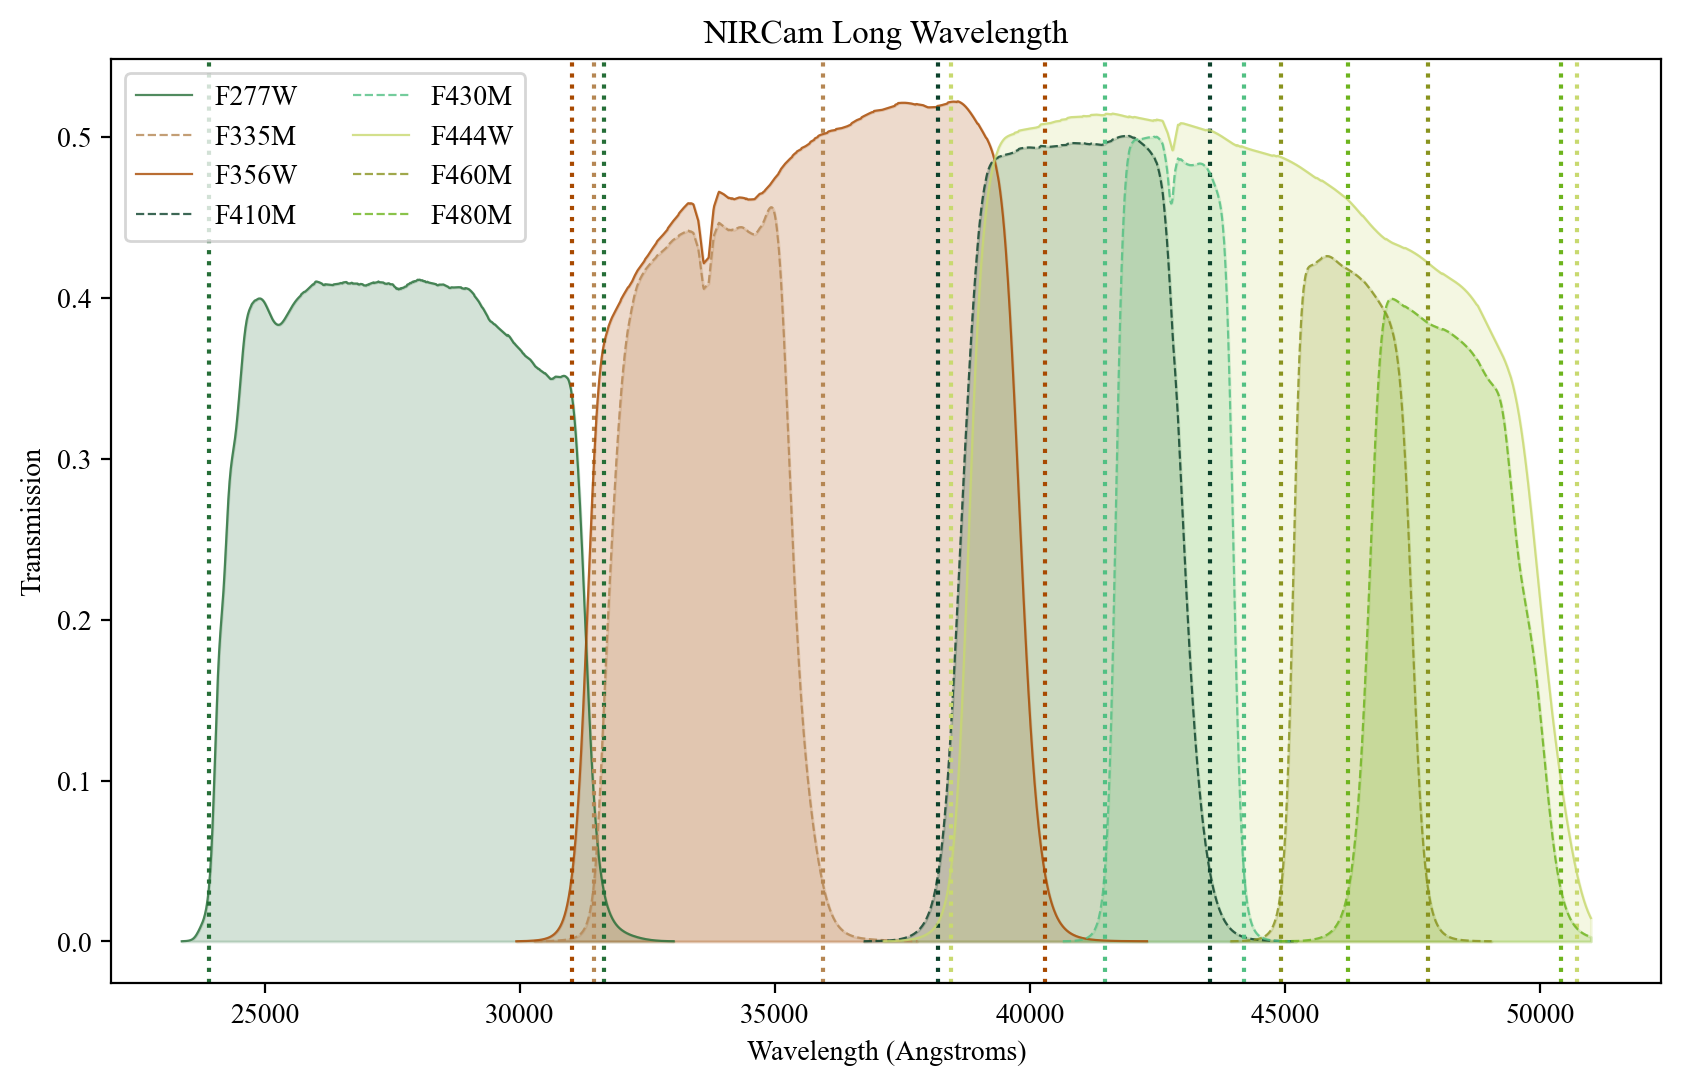

435w : 3671 4850
606w : 4659 7127
775w : 6877 8575
814w : 6926 9582
850lp : 8105 10560


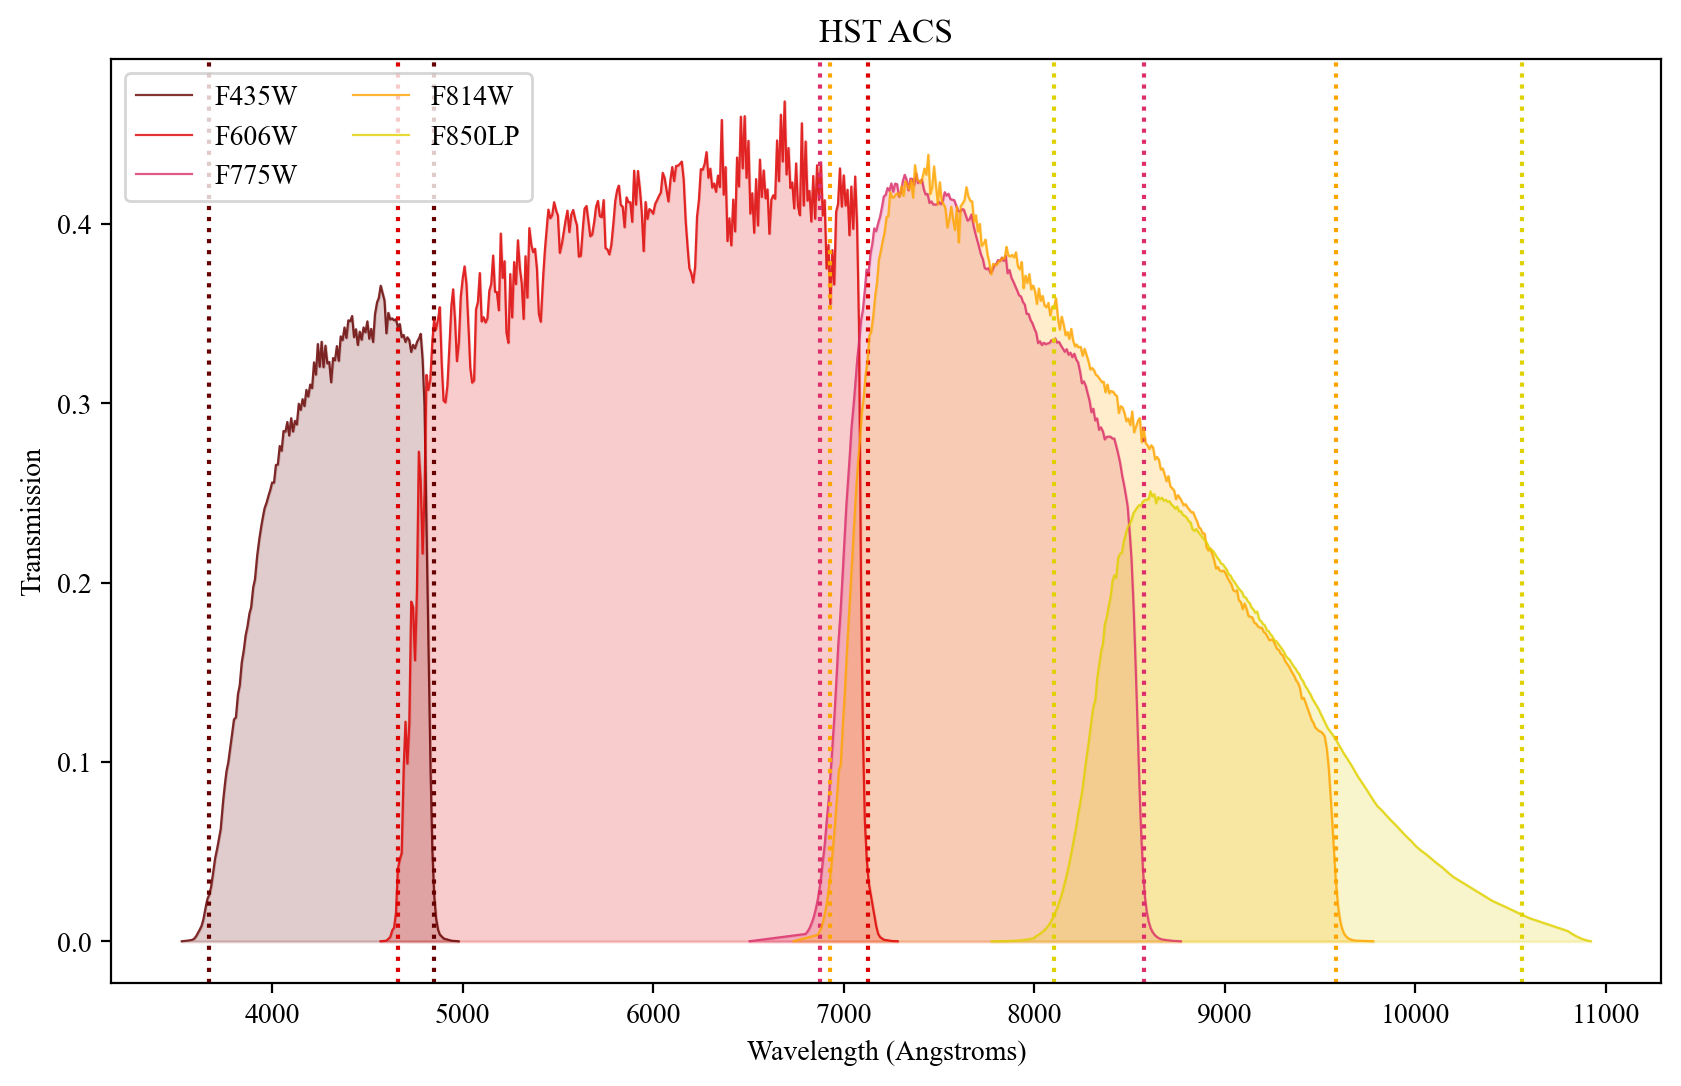

In [17]:
for telescope in filters_list:
    plt.figure(figsize=(10, 6), dpi=200)
    for i, filter in enumerate(telescope['filters']):
        filter = re.sub(r'[^0-9]', '', filter)
        for file in os.listdir(os.path.join(homedir, "Filter_files")):
            if filter in file and file.endswith('.dat'):
                data = np.loadtxt(os.path.join(homedir, "Filter_files", file))
                
        plt.plot(data[:,0], data[:,1], color=telescope['colours'][i], label='F'+telescope['filters'][i].upper(), linestyle=('--' if 'm' in telescope['filters'][i] else '-'), alpha=0.8,
                linewidth=0.8)
        plt.fill_between(data[:,0], data[:, 1], color=telescope['colours'][i], alpha=0.2)
        WLines = data[np.isclose(data[:, 1], max(data[:, 1])*0.10, atol=0.01, rtol=0.01), 0]
        print(telescope['filters'][i], ":", round(min(WLines)), round(max(WLines)))
        plt.axvline(x=min(WLines), color=telescope['colours'][i], linestyle=':')
        plt.axvline(x=max(WLines), color=telescope['colours'][i], linestyle=':')
        
    plt.title(telescope['Telescope'])
    plt.xlabel('Wavelength ()')
    plt.ylabel('Transmission')
    plt.legend(loc=2, ncols=2)
    plt.show()

356w :  31024, 40294 <br>
410m :  38199, 43537

Hα :  6563 <br>
OIII : 5007

In [11]:
print("356w")
print((31024/5007)-1, (40294/5007)-1)
print((31024/6563)-1, (40294/6563)-1)

356w
5.196125424405832 7.047533453165569
3.7271065061709585 5.139570318451928


In [12]:
print("410m")
print((38199/5007)-1, (43537/5007)-1)
print((38199/6563)-1, (43537/6563)-1)

410m
6.6291192330736965 7.695226682644298
4.820356544263294 5.633704098735334
